<h1>Blob Detection</h1>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

True

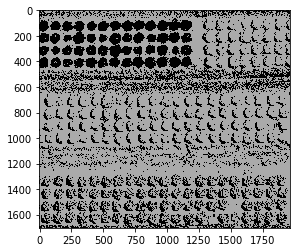

In [2]:
image = cv2.imread("horticultura.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


ret,thresh1 = cv2.threshold(gray, 80, 170, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
cv2.imwrite('thresh1.png', thresh1)




37


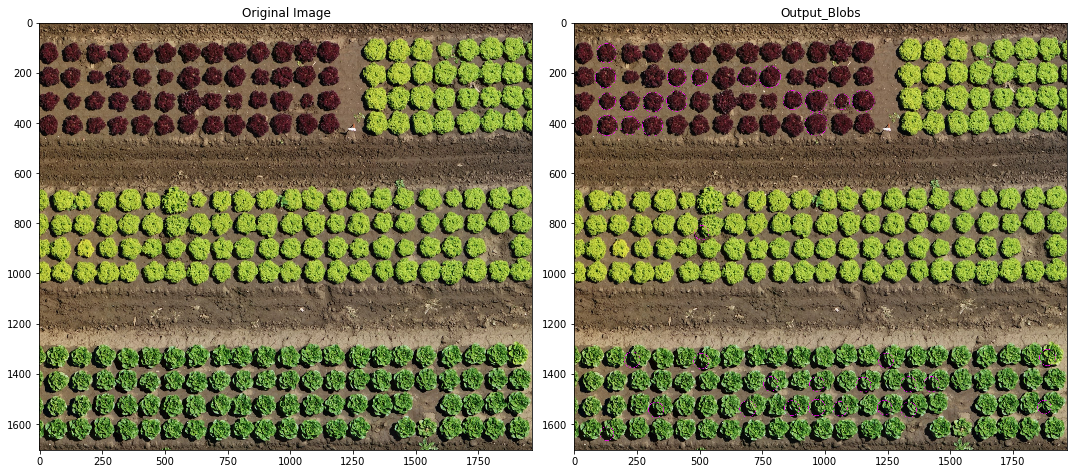

In [3]:
# Setear el detector con parametro default
def init_blob_detector():
    params = cv2.SimpleBlobDetector_Params()
    params.minThreshold = 0
    params.maxThreshold = 50
    params.filterByArea = True
    params.minArea = 2500
    params.maxArea = 8000
    params.filterByCircularity = True
    params.minCircularity = 0.1
    params.filterByConvexity = False
    params.filterByInertia = False
    #detector = cv2.SimpleBlobDetector(params)
    detector = cv2.SimpleBlobDetector_create(params)
    return detector

keypoints = init_blob_detector().detect(thresh1)
print(len(keypoints))
 
 
## Dibujar blobs como circulos rojos
## cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS asegura que el tamaño del
## circulo corresponda al tamaño del blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


 
    
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
cv2.imwrite('input.jpg', image)

axs[1].imshow(cv2.cvtColor(blobs, cv2.COLOR_BGR2RGB))
axs[1].set_title('Output_Blobs')
cv2.imwrite('output_blobs.jpg', blobs)

plt.show()
